# Initialization
Initialize the enviroment, and load the data

In [1]:
import tensorflow as tf                  # TensorFlow
import tensorflow.nn as nn               # nn contains useful neural network functions like softmax, relu, tanh
from tensorflow import keras             # high level API for TensorFlow
import tensorflow.keras.layers as layers # contains layers like RNN, CNN, LSTM
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
import numpy as np                       # standard numerical python

# Install pywt
from sklearn.model_selection import train_test_split   
import pywt

In [2]:
isTrmmingEnable = 1
isLowpassFilteringEnable = 1
isWPDEnable = 1
WPDLevel = 3

# Loading Data

In [3]:
X_test = np.load("drive/My Drive/UCLA/EE 247/Project/project_data/X_test.npy")
y_test = np.load("drive/My Drive/UCLA/EE 247/Project/project_data/y_test.npy")
person_train_valid = np.load("drive/My Drive/UCLA/EE 247/Project/project_data/person_train_valid.npy")
X_train_valid = np.load("drive/My Drive/UCLA/EE 247/Project/project_data/X_train_valid.npy")
y_train_valid = np.load("drive/My Drive/UCLA/EE 247/Project/project_data/y_train_valid.npy")
person_test = np.load("drive/My Drive/UCLA/EE 247/Project/project_data/person_test.npy")

## Printing the shapes of the numpy arrays

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [4]:
y_train_valid -= 769
y_test -= 769

## Preprocess the signal


### Filter the data with low pass filter

In [5]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft

# Trim the data, save the data with useful information
if isTrmmingEnable:
  X_test = X_test[:,:,0:500]
  X_train_valid = X_train_valid[:,:,0:500]

In [6]:
if isLowpassFilteringEnable:
  # Low pass signal to 0.5Hz to 100 Hz
  fs = 250  # Sampling frequency
  nyq = fs * 0.5

  fc = 100  # Cut-off frequency of the filter
  w = fc / nyq # Normalize the frequency
  b, a = signal.butter(7, w, 'low')
  X_train_valid = signal.filtfilt(b, a, X_train_valid, axis = 2)
  X_test = signal.filtfilt(b, a, X_test, axis = 2)



  print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
  print ('Test data shape: {}'.format(X_test.shape))
  print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
  print ('Test target shape: {}'.format(y_test.shape))
  print ('Person train/valid shape: {}'.format(person_train_valid.shape))
  print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 500)
Test data shape: (443, 22, 500)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Using Wavelet Packet Decomposition(WPD) to extract the feature 

In [7]:
if isWPDEnable:
  level = WPDLevel
  X_train_valid_wpTree = pywt.WaveletPacket(data=X_train_valid, wavelet='db1', mode = 'symmetric', maxlevel = 3, axis = 2)
  X_train_valid_lf = X_train_valid_wpTree['aaa'].data
  X_train_valid_mf = X_train_valid_wpTree['aad'].data
  X_train_valid_hf = X_train_valid_wpTree['ada'].data
  X_train_valid = np.stack([X_train_valid_lf, X_train_valid_mf, X_train_valid_hf], axis = 3)



  X_test_wpTree = pywt.WaveletPacket(data=X_test, wavelet='db1', mode = 'symmetric', maxlevel = 3, axis = 2)
  X_test_lf = X_test_wpTree['aaa'].data
  X_test_mf = X_test_wpTree['aad'].data
  X_test_hf = X_test_wpTree['ada'].data
  X_test = np.stack([X_test_lf, X_test_mf, X_test_hf], axis = 3)
  print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
  print ('Test data shape: {}'.format(X_test.shape))
  print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
  print ('Test target shape: {}'.format(y_test.shape))
  print ('Person train/valid shape: {}'.format(person_train_valid.shape))
  print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 63, 3)
Test data shape: (443, 22, 63, 3)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [8]:
batch_size, _, timeStamps, depth = X_train_valid.shape

x_temp = np.zeros(batch_size*6*7*timeStamps*depth)
x_temp = x_temp.reshape(batch_size, 6, 7, timeStamps, depth)
x_temp[:, 0, 3, :, :] = X_train_valid[:, 0,:,:]
x_temp[:, 1, 1, :, :] = X_train_valid[:, 1,:,:]
x_temp[:, 1, 2, :, :] = X_train_valid[:, 2,:,:]
x_temp[:, 1, 3, :, :] = X_train_valid[:, 3,:,:]
x_temp[:, 1, 4, :, :] = X_train_valid[:, 4,:,:]
x_temp[:, 1, 5, :, :] = X_train_valid[:, 5,:,:]
x_temp[:, 2, 0, :, :] = X_train_valid[:, 6,:,:]
x_temp[:, 2, 1, :, :] = X_train_valid[:, 7,:,:]
x_temp[:, 2, 2, :, :] = X_train_valid[:, 8,:,:]
x_temp[:, 2, 3, :, :] = X_train_valid[:, 9,:,:]
x_temp[:, 2, 4, :, :] = X_train_valid[:,10,:,:]
x_temp[:, 2, 5, :, :] = X_train_valid[:,11,:,:]
x_temp[:, 2, 6, :, :] = X_train_valid[:,12,:,:]
x_temp[:, 3, 1, :, :] = X_train_valid[:,13,:,:]
x_temp[:, 3, 2, :, :] = X_train_valid[:,14,:,:]
x_temp[:, 3, 3, :, :] = X_train_valid[:,15,:,:]
x_temp[:, 3, 4, :, :] = X_train_valid[:,16,:,:]
x_temp[:, 3, 5, :, :] = X_train_valid[:,17,:,:]
x_temp[:, 4, 2, :, :] = X_train_valid[:,18,:,:]
x_temp[:, 4, 3, :, :] = X_train_valid[:,19,:,:]
x_temp[:, 4, 4, :, :] = X_train_valid[:,20,:,:]
x_temp[:, 5, 3, :, :] = X_train_valid[:,21,:,:]
X_train_valid = x_temp

batch_size, _, timeStamps, depth = X_test.shape
x_temp = np.zeros(batch_size*6*7*timeStamps*depth)
x_temp = x_temp.reshape(batch_size, 6, 7, timeStamps, depth)
x_temp[:, 0, 3, :, :] = X_test[:, 0,:,:]
x_temp[:, 1, 1, :, :] = X_test[:, 1,:,:]
x_temp[:, 1, 2, :, :] = X_test[:, 2,:,:]
x_temp[:, 1, 3, :, :] = X_test[:, 3,:,:]
x_temp[:, 1, 4, :, :] = X_test[:, 4,:,:]
x_temp[:, 1, 5, :, :] = X_test[:, 5,:,:]
x_temp[:, 2, 0, :, :] = X_test[:, 6,:,:]
x_temp[:, 2, 1, :, :] = X_test[:, 7,:,:]
x_temp[:, 2, 2, :, :] = X_test[:, 8,:,:]
x_temp[:, 2, 3, :, :] = X_test[:, 9,:,:]
x_temp[:, 2, 4, :, :] = X_test[:,10,:,:]
x_temp[:, 2, 5, :, :] = X_test[:,11,:,:]
x_temp[:, 2, 6, :, :] = X_test[:,12,:,:]
x_temp[:, 3, 1, :, :] = X_test[:,13,:,:]
x_temp[:, 3, 2, :, :] = X_test[:,14,:,:]
x_temp[:, 3, 3, :, :] = X_test[:,15,:,:]
x_temp[:, 3, 4, :, :] = X_test[:,16,:,:]
x_temp[:, 3, 5, :, :] = X_test[:,17,:,:]
x_temp[:, 4, 2, :, :] = X_test[:,18,:,:]
x_temp[:, 4, 3, :, :] = X_test[:,19,:,:]
x_temp[:, 4, 4, :, :] = X_test[:,20,:,:]
x_temp[:, 5, 3, :, :] = X_test[:,21,:,:]
X_test = x_temp

In [9]:
#(Sample, Height, Width, Time, Depth) -> (Sample, Time, Height, Width, Depth)
X_train_valid = X_train_valid.transpose(0, 3, 1, 2, 4)
x_test = X_test.transpose(0, 3, 1, 2, 4)
print('Shape of training set after dimension reshaping:',X_train_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)



# Creating the training and validation sets
# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(2115, 500, replace = False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))


# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid[ind_train], X_train_valid[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)


# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)





Shape of training set after dimension reshaping: (2115, 63, 6, 7, 3)
Shape of test set after dimension reshaping: (443, 63, 6, 7, 3)
Shape of training set: (1615, 63, 6, 7, 3)
Shape of validation set: (500, 63, 6, 7, 3)
Shape of training labels: (1615,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (1615, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)


# Initializing Neural Network

In [17]:
# Build the CNN model
input_Shape = (x_train.shape[2], x_train.shape[3], x_train.shape[4])
cnn = Sequential(name = "cnn_Blocks")
cnn.add(layers.Conv2D(32, (3, 3), strides=(1,1), input_shape=input_Shape, padding = 'same', activation='elu', name="conv_1"))
cnn.add(layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))
cnn.add(layers.BatchNormalization(name = "BN_1"))
cnn.add(layers.Dropout(0.5, name="DO_1"))
cnn.add(layers.Conv2D(64, (3, 3), strides=(1,1), activation='elu', name="conv_2"))
cnn.add(layers.MaxPooling2D(pool_size = (2,2), strides =(1, 1), padding = "same", name = "maxpool_2"))
cnn.add(layers.BatchNormalization(name = "BN_2"))
cnn.add(layers.Dropout(0.5, name="DO_2"))
cnn.add(layers.Conv2D(128, (3, 3), strides=(1,1), activation='elu', name="conv_3"))
cnn.add(layers.MaxPooling2D(pool_size = (2,2), strides =(1, 1), padding = "same", name = "maxpool_3"))
cnn.add(layers.BatchNormalization(name = "BN_3"))
cnn.add(layers.Dropout(0.5, name="DO_3"))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(100, name = "FC_1"))
cnn.summary()

Model: "cnn_Blocks"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 6, 7, 32)          896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 7, 32)         0         
 2D)                                                             
                                                                 
 BN_1 (BatchNormalization)   (None, 6, 7, 32)          128       
                                                                 
 DO_1 (Dropout)              (None, 6, 7, 32)          0         
                                                                 
 conv_2 (Conv2D)             (None, 4, 5, 64)          18496     
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 4, 5, 64)          0         
                                                        

In [18]:
# now wrap the model inputs and outputs
# Build the LSTM layer
input_Shape = cnn.output_shape
rnn = Sequential(name = "LSTM_block")
rnn.add(layers.GRU(10, dropout = 0.5, recurrent_dropout = 0.1, return_sequences=False, input_shape=input_Shape, name="lstm_1"))


# Build the dense layer
dense = Sequential(name = "Output_block")
dense.add(layers.Dense(4, activation = 'softmax'))



# Define the input layer
input_Shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3], x_train.shape[4])
inputs = keras.Input(shape=input_Shape, name = "EEG")
x = layers.TimeDistributed(cnn, name = 'CNN_block')(inputs)
x = rnn(x) # combine timedistributed cnn with rnn
Output = dense(x) # add dense
final_model = keras.Model(inputs=inputs, outputs=Output, name="CNN_LSTM_model")

# we can now print a summary of the model as before
final_model.summary()

Model: "CNN_LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EEG (InputLayer)            [(None, 63, 6, 7, 3)]     0         
                                                                 
 CNN_block (TimeDistributed)  (None, 63, 100)          171044    
                                                                 
 LSTM_block (Sequential)     (None, 10)                3360      
                                                                 
 Output_block (Sequential)   (None, 4)                 44        
                                                                 
Total params: 174,448
Trainable params: 174,000
Non-trainable params: 448
_________________________________________________________________


In [19]:
#Hyper Parameter
learning_rate = 1e-3
epochs = 1000
batch_size = 200

In [20]:
opt = keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
final_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
%load_ext tensorboard
import datetime


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [22]:
cnn_lstm_2D_trained = final_model.fit(x_train,
             y_train,
             batch_size=batch_size,
             epochs=epochs,
             validation_data = (x_valid, y_valid), verbose=True)

Epoch 1/1000
9/9 [==============================] - 10s 765ms/step - loss: 1.5143 - accuracy: 0.2700 - val_loss: 1.4907 - val_accuracy: 0.2580
Epoch 2/1000
9/9 [==============================] - 6s 667ms/step - loss: 1.5045 - accuracy: 0.2539 - val_loss: 1.4759 - val_accuracy: 0.2600
Epoch 3/1000
9/9 [==============================] - 6s 665ms/step - loss: 1.4765 - accuracy: 0.2638 - val_loss: 1.4407 - val_accuracy: 0.2760
Epoch 4/1000
9/9 [==============================] - 6s 650ms/step - loss: 1.4633 - accuracy: 0.2526 - val_loss: 1.4206 - val_accuracy: 0.3040
Epoch 5/1000
9/9 [==============================] - 6s 687ms/step - loss: 1.4311 - accuracy: 0.2687 - val_loss: 1.3919 - val_accuracy: 0.2660
Epoch 6/1000
9/9 [==============================] - 6s 647ms/step - loss: 1.4456 - accuracy: 0.2632 - val_loss: 1.4043 - val_accuracy: 0.2640
Epoch 7/1000
9/9 [==============================] - 6s 637ms/step - loss: 1.4465 - accuracy: 0.2452 - val_loss: 1.4027 - val_accuracy: 0.2720
Epoch

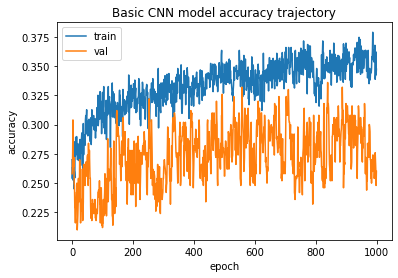

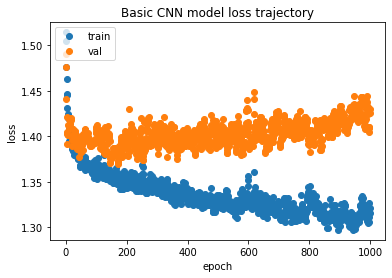

In [24]:
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(cnn_lstm_2D_trained.history['accuracy'])
plt.plot(cnn_lstm_2D_trained.history['val_accuracy'])
plt.title('Basic CNN model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(cnn_lstm_2D_trained.history['loss'],'o')
plt.plot(cnn_lstm_2D_trained.history['val_loss'],'o')
plt.title('Basic CNN model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
cnn_score = final_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the basic CNN model:',cnn_score[1])

Test accuracy of the basic CNN model: 0.31151241064071655


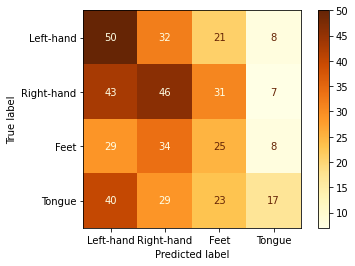

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = final_model.predict([x_test])
Y_pred = np.argmax(Y_pred, axis=1)
Y_test = np.argmax(y_test, axis=1)

labels = ["Left-hand", "Right-hand", "Feet", "Tongue"]
cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.YlOrBr)
plt.show()


In [60]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [68]:
print('Subject | Test Accuracy | Precision |  Recall  |   F1')
for subject in range(9):
  idx_sub = np.where(person_test[:, 0] == subject)
  Y_pred = final_model.predict(x_test[idx_sub])
  #Y_pred = np.argmax(Y_pred, axis=1)
  Y_true = y_test[idx_sub]
  #Y_true = np.argmax(y_test[idx_sub], axis=1)
  loss, accuracy = final_model.evaluate(x_test[idx_sub], y_test[idx_sub], verbose=0)
  precision = precision_m(Y_true, Y_pred) 
  recall = recall_m(Y_true, Y_pred) 
  f1_score = f1_m(Y_true, Y_pred) 

  print(str(subject + 1) + '       | ', "{:.4f}".format(accuracy), '      | ', "{:.4f}".format(precision), '  | ', "{:.4f}".format(recall), ' | ', "{:.4f}".format(f1_score))



Subject | Test Accuracy | Precision |  Recall  |   F1
1       |  0.2800       |  1.0000   |  0.0200  |  0.0392
2       |  0.2600       |  0.0000   |  0.0000  |  0.0000
3       |  0.2800       |  1.0000   |  0.0200  |  0.0392
4       |  0.2600       |  0.0000   |  0.0000  |  0.0000
5       |  0.3404       |  0.0000   |  0.0000  |  0.0000
6       |  0.3878       |  0.5000   |  0.0408  |  0.0755
7       |  0.2400       |  0.0000   |  0.0000  |  0.0000
8       |  0.4000       |  0.3333   |  0.0200  |  0.0377
9       |  0.3617       |  0.4000   |  0.0851  |  0.1404


In [59]:
#person_train_valid
#person_test
idx_sub = np.where(person_test[:, 0] == 1)
loss, accuracy = final_model.evaluate(x_test[idx_sub], y_test[idx_sub], verbose=0)
temp = ["Subject" + str(1), loss, accuracy]
print(accuracy)

0.25999999046325684
